In [1]:
import numpy as np

import cirq

from cirq.contrib.svg import SVGCircuit
from cirq import Simulator

%matplotlib inline

In [2]:
alpha = cirq.NamedQubit('alpha')

In [3]:
q0 = cirq.GridQubit(0,0)
print(q0)

(0, 0)


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


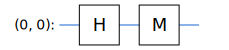

In [4]:
circuit = cirq.Circuit(cirq.H(q0), cirq.measure(q0))
#circuit = cirq.Circuit(cirq.H(q0), cirq.measure(q0))
SVGCircuit(circuit)

In [5]:
simulator = Simulator()
result = simulator.run(circuit,repetitions = 5)
print(result)

(0, 0)=10000


In [6]:
result = simulator.simulate(circuit)

print(np.around(result.final_state, 3))

[0.+0.j 1.+0.j]


In [7]:
qubit_mixture = cirq.wavefunction_partial_trace_as_mixture(
                cirq.final_wavefunction(circuit), keep_indices=[0])

for probability, case in qubit_mixture:
    print(f'{cirq.dirac_notation(case)} {probability:%}')

|0⟩ 99.999988%


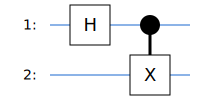

In [8]:
msg, R, S = cirq.LineQubit.range(3)
circuit = cirq.Circuit(cirq.H(R), cirq.CNOT(R,S))
SVGCircuit(circuit)

In [9]:
full_wavefunction = cirq.final_wavefunction(circuit, qubit_order=[msg, R, S])
qubit_mixture = cirq.wavefunction_partial_trace_as_mixture(
                full_wavefunction, keep_indices=[1]) # offset 1 in qubit order [msg, R, S] id R

for probability, case in qubit_mixture:
    print(f'{cirq.dirac_notation(case)} {probability:%}')

|0⟩ 49.999997%
|1⟩ 49.999997%


In [10]:
a, b = cirq.LineQubit.range(2)
circuit = cirq.Circuit(cirq.H(a), cirq.CNOT(a,b))

full_wavefunction = cirq.final_wavefunction(circuit, qubit_order=[a, b])
qubit_mixture = cirq.wavefunction_partial_trace_as_mixture(
                full_wavefunction, keep_indices=[1])

for probability, case in qubit_mixture:
    print(f'{cirq.dirac_notation(case)} {probability:%}')

|0⟩ 49.999997%
|1⟩ 49.999997%


ValueError: keep_indices {} are an invalid subset of the input wavefunction.